In [21]:

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '8899eb03-3414-400d-81f4-debad6f17177',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2022-07-24T21:15:49.374Z', 'error_code': 0, 'error_message': None, 'elapsed': 36, 'credit_count': 1, 'notice': None, 'total_count': 9926}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9634, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [22]:
type(data)

dict

In [23]:
import pandas as pd

# Allows to see all the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [24]:
# This normalizes the data and makes it more presentable in a dataframe
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

/Users/gregorygreen/Library/Python/3.8/lib/python/site-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9634,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19102293.00000,19102293.00000,NaN,1,NaN,NaN,None,2022-07-24T21:14:00.000Z,22750.03055,22244359525.52491,-3.25770,0.14496,2.03867,8.43344,6.94077,-23.50645,-43.37972,434577749399.57318,41.58790,477750641631.92999,None,2022-07-24T21:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-24 21:15:57.770525
1,1027,Ethereum,ETH,ethereum,5842,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121682519.37400,121682519.37400,NaN,2,NaN,NaN,None,2022-07-24T21:13:00.000Z,1614.67445,15498524516.36353,6.83530,0.72065,6.09863,19.80098,32.12984,-17.48113,-46.17508,196477654950.38806,18.81060,196477654950.39001,None,2022-07-24T21:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-24 21:15:57.770525
2,825,Tether,USDT,tether,36592,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,65841277710.53098,68166976392.72330,NaN,3,NaN,NaN,None,2022-07-24T21:13:00.000Z,1.00008,39664990156.52520,-4.26310,0.00820,0.00209,0.03424,0.07455,0.10970,-0.00931,65846425150.07379,6.30130,68172305654.27000,None,2022-07-24T21:13:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-07-24 21:15:57.770525
3,3408,USD Coin,USDC,usd-coin,4938,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,55096057831.29465,55096057831.29465,NaN,4,NaN,NaN,None,2022-07-24T21:13:00.000Z,1.00025,4722022904.01496,-9.80550,-0.00246,0.01569,0.01731,0.00685,0.03370,-0.01192,55109765453.63214,5.27480,55109765453.63000,None,2022-07-24T21:13:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-07-24 21:15:57.770525
4,1839,BNB,BNB,bnb,1020,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,None,2022-07-24T21:13:00.000Z,263.29049,878830869.62154,-19.00690,0.37016,2.91621,5.60124,10.23471,-19.67235,-34.53575,42478565852.80936,4.06580,52658097163.45000,None,2022-07-24T21:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-24 21:15:57.770525
5,52,XRP,XRP,xrp,778,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",100000000000.00000,48343101197.00000,99989535142.00000,NaN,6,NaN,NaN,None,2022-07-24T21:14:00.000Z,0.36337,881267207.04647,3.36000,0.40108,2.13295,4.15526,-0.83350,-10.71609,-47.26309,17566403558.41179,1.68140,36336939756.57000,None,2022-07-24T21:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-24 21:15:57.770525
6,4687,Binance USD,BUSD,binance-usd,4145,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,17547224379.45926,17547224379.45926,NaN,7,NaN,NaN,None,2022-07-24T21:13:00.000Z,0.99905,4466092990.47636,-0.25500,-0.17984,-0.19658,-0.19468,-0.25992,-0.02178,0.01610,17530514532.17922,1.67790,17530514532.18000,None,2022-07-24T21:13:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-07-24 21:15:57.770525
7,2010,Cardano,ADA,cardano,521,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",45000000000.00000,33752565071.28800,34277702081.60500,NaN,8,NaN,NaN,None,2022-07-24T21:13:00.000Z,0.51814,985254103.23748,42.56720,0.12625,4.37637,15.73876,3.19196,0.26611,-41.88393,17488447274.65146,1.67430,23316157622.31000,None,2022-07-24T21:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-24 21:15

In [25]:
def api_runner():  #call function
    global df

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' # call API
    parameters = {
    'start':'1',
    'limit':'15',
    'convert':'USD'
    }
    headers = {                                                                 # use key
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '8899eb03-3414-400d-81f4-debad6f17177',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df= df.append(df2)

    if not os.path.isfile(r'/Users/gregorygreen/API.csv'):                          # append data to a csv: in case of computer shutdown
        df.to_csv(r'/Users/gregorygreen/API.csv', header='column_names')
    else:
        df.to_csv(r'/Users/gregorygreen/API.csv', mode='a', header=False)

In [26]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed successfully')
    sleep(60) # sleep for 1 minute
exit()

/Users/gregorygreen/Library/Python/3.8/lib/python/site-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/var/folders/0q/x1bkfxj91nqfpxyr8y88v65r0000gn/T/ipykernel_6154/1371165506.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df= df.append(df2)


API Runner completed successfully


/Users/gregorygreen/Library/Python/3.8/lib/python/site-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/var/folders/0q/x1bkfxj91nqfpxyr8y88v65r0000gn/T/ipykernel_6154/1371165506.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df= df.append(df2)


API Runner completed successfully


KeyboardInterrupt: 

In [27]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9634,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19102293.00000,19102293.00000,NaN,1,NaN,NaN,None,2022-07-24T21:14:00.000Z,22750.03055,22244359525.52491,-3.25770,0.14496,2.03867,8.43344,6.94077,-23.50645,-43.37972,434577749399.57318,41.58790,477750641631.92999,None,2022-07-24T21:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-24 21:15:57.770525
1,1027,Ethereum,ETH,ethereum,5842,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121682519.37400,121682519.37400,NaN,2,NaN,NaN,None,2022-07-24T21:13:00.000Z,1614.67445,15498524516.36353,6.83530,0.72065,6.09863,19.80098,32.12984,-17.48113,-46.17508,196477654950.38806,18.81060,196477654950.39001,None,2022-07-24T21:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-24 21:15:57.770525
2,825,Tether,USDT,tether,36592,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,65841277710.53098,68166976392.72330,NaN,3,NaN,NaN,None,2022-07-24T21:13:00.000Z,1.00008,39664990156.52520,-4.26310,0.00820,0.00209,0.03424,0.07455,0.10970,-0.00931,65846425150.07379,6.30130,68172305654.27000,None,2022-07-24T21:13:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-07-24 21:15:57.770525
3,3408,USD Coin,USDC,usd-coin,4938,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,55096057831.29465,55096057831.29465,NaN,4,NaN,NaN,None,2022-07-24T21:13:00.000Z,1.00025,4722022904.01496,-9.80550,-0.00246,0.01569,0.01731,0.00685,0.03370,-0.01192,55109765453.63214,5.27480,55109765453.63000,None,2022-07-24T21:13:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-07-24 21:15:57.770525
4,1839,BNB,BNB,bnb,1020,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,None,2022-07-24T21:13:00.000Z,263.29049,878830869.62154,-19.00690,0.37016,2.91621,5.60124,10.23471,-19.67235,-34.53575,42478565852.80936,4.06580,52658097163.45000,None,2022-07-24T21:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-24 21:15:57.770525
5,52,XRP,XRP,xrp,778,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",100000000000.00000,48343101197.00000,99989535142.00000,NaN,6,NaN,NaN,None,2022-07-24T21:14:00.000Z,0.36337,881267207.04647,3.36000,0.40108,2.13295,4.15526,-0.83350,-10.71609,-47.26309,17566403558.41179,1.68140,36336939756.57000,None,2022-07-24T21:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-24 21:15:57.770525
6,4687,Binance USD,BUSD,binance-usd,4145,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,17547224379.45926,17547224379.45926,NaN,7,NaN,NaN,None,2022-07-24T21:13:00.000Z,0.99905,4466092990.47636,-0.25500,-0.17984,-0.19658,-0.19468,-0.25992,-0.02178,0.01610,17530514532.17922,1.67790,17530514532.18000,None,2022-07-24T21:13:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-07-24 21:15:57.770525
7,2010,Cardano,ADA,cardano,521,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",45000000000.00000,33752565071.28800,34277702081.60500,NaN,8,NaN,NaN,None,2022-07-24T21:13:00.000Z,0.51814,985254103.23748,42.56720,0.12625,4.37637,15.73876,3.19196,0.26611,-41.88393,17488447274.65146,1.67430,23316157622.31000,None,2022-07-24T21:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-24 21:15

In [28]:
# In scientific notation. Fully fleshed out the numbers (removed notations)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [29]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9634,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19102293.00000,19102293.00000,NaN,1,NaN,NaN,None,2022-07-24T21:14:00.000Z,22750.03055,22244359525.52491,-3.25770,0.14496,2.03867,8.43344,6.94077,-23.50645,-43.37972,434577749399.57318,41.58790,477750641631.92999,None,2022-07-24T21:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-24 21:15:57.770525
1,1027,Ethereum,ETH,ethereum,5842,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121682519.37400,121682519.37400,NaN,2,NaN,NaN,None,2022-07-24T21:13:00.000Z,1614.67445,15498524516.36353,6.83530,0.72065,6.09863,19.80098,32.12984,-17.48113,-46.17508,196477654950.38806,18.81060,196477654950.39001,None,2022-07-24T21:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-24 21:15:57.770525
2,825,Tether,USDT,tether,36592,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,65841277710.53098,68166976392.72330,NaN,3,NaN,NaN,None,2022-07-24T21:13:00.000Z,1.00008,39664990156.52520,-4.26310,0.00820,0.00209,0.03424,0.07455,0.10970,-0.00931,65846425150.07379,6.30130,68172305654.27000,None,2022-07-24T21:13:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-07-24 21:15:57.770525
3,3408,USD Coin,USDC,usd-coin,4938,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,55096057831.29465,55096057831.29465,NaN,4,NaN,NaN,None,2022-07-24T21:13:00.000Z,1.00025,4722022904.01496,-9.80550,-0.00246,0.01569,0.01731,0.00685,0.03370,-0.01192,55109765453.63214,5.27480,55109765453.63000,None,2022-07-24T21:13:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-07-24 21:15:57.770525
4,1839,BNB,BNB,bnb,1020,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,None,2022-07-24T21:13:00.000Z,263.29049,878830869.62154,-19.00690,0.37016,2.91621,5.60124,10.23471,-19.67235,-34.53575,42478565852.80936,4.06580,52658097163.45000,None,2022-07-24T21:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-24 21:15:57.770525
5,52,XRP,XRP,xrp,778,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",100000000000.00000,48343101197.00000,99989535142.00000,NaN,6,NaN,NaN,None,2022-07-24T21:14:00.000Z,0.36337,881267207.04647,3.36000,0.40108,2.13295,4.15526,-0.83350,-10.71609,-47.26309,17566403558.41179,1.68140,36336939756.57000,None,2022-07-24T21:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-24 21:15:57.770525
6,4687,Binance USD,BUSD,binance-usd,4145,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,17547224379.45926,17547224379.45926,NaN,7,NaN,NaN,None,2022-07-24T21:13:00.000Z,0.99905,4466092990.47636,-0.25500,-0.17984,-0.19658,-0.19468,-0.25992,-0.02178,0.01610,17530514532.17922,1.67790,17530514532.18000,None,2022-07-24T21:13:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-07-24 21:15:57.770525
7,2010,Cardano,ADA,cardano,521,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",45000000000.00000,33752565071.28800,34277702081.60500,NaN,8,NaN,NaN,None,2022-07-24T21:13:00.000Z,0.51814,985254103.23748,42.56720,0.12625,4.37637,15.73876,3.19196,0.26611,-41.88393,17488447274.65146,1.67430,23316157622.31000,None,2022-07-24T21:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-24 21:15

In [30]:
# Look at the coin trends over time
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.14496,2.03867,8.43344,6.94077,-23.50645,-43.37972
Ethereum,0.72065,6.09863,19.80098,32.12984,-17.48113,-46.17508
Tether,0.00820,0.00209,0.03424,0.07455,0.10970,-0.00931
USD Coin,-0.00246,0.01569,0.01731,0.00685,0.03370,-0.01192
BNB,0.37016,2.91621,5.60124,10.23471,-19.67235,-34.53575
XRP,0.40108,2.13295,4.15526,-0.83350,-10.71609,-47.26309
Binance USD,-0.17984,-0.19658,-0.19468,-0.25992,-0.02178,0.01610
Cardano,0.12625,4.37637,15.73876,3.19196,0.26611,-41.88393
Solana,0.65585,4.09695,4.98888,-0.15827,-15.17680,-58.92112


In [31]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.14496
             quote.USD.percent_change_24h     2.03867
             quote.USD.percent_change_7d      8.43344
             quote.USD.percent_change_30d     6.94077
             quote.USD.percent_change_60d   -23.50645
             quote.USD.percent_change_90d   -43.37972
Ethereum     quote.USD.percent_change_1h      0.72065
             quote.USD.percent_change_24h     6.09863
             quote.USD.percent_change_7d     19.80098
             quote.USD.percent_change_30d    32.12984
             quote.USD.percent_change_60d   -17.48113
             quote.USD.percent_change_90d   -46.17508
Tether       quote.USD.percent_change_1h      0.00820
             quote.USD.percent_change_24h     0.00209
             quote.USD.percent_change_7d      0.03424
             quote.USD.percent_change_30d     0.07455
             quote.USD.percent_change_60d     0.10970
             quote.USD.percent_change_90

In [32]:
type(df4)

pandas.core.series.Series

In [33]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.14496
            quote.USD.percent_change_24h   2.03867
            quote.USD.percent_change_7d    8.43344
            quote.USD.percent_change_30d   6.94077
            quote.USD.percent_change_60d -23.50645
            quote.USD.percent_change_90d -43.37972
Ethereum    quote.USD.percent_change_1h    0.72065
            quote.USD.percent_change_24h   6.09863
            quote.USD.percent_change_7d   19.80098
            quote.USD.percent_change_30d  32.12984
            quote.USD.percent_change_60d -17.48113
            quote.USD.percent_change_90d -46.17508
Tether      quote.USD.percent_change_1h    0.00820
            quote.USD.percent_change_24h   0.00209
            quote.USD.percent_change_7d    0.03424
            quote.USD.percent_change_30d   0.07455
            quote.USD.percent_change_60d   0.10970
            quote.USD.percent_change_90d  -0.00931
USD Coin    quote.USD.percent_change_1h   -0.00246
            quote.USD.percent_change_24h   0.01569
            quote.USD.percent_change_7d    0.01731
            quote.USD.percent_change_30d   0.00685
            quote.USD.percent_change_60d   0.03370
            quote.USD.percent_change_90d  -0.01192
BNB         quote.USD.percent_change_1h    0.37016
            quote.USD.percent_change_24h   2.91621
            quote.USD.percent_change_7d    5.60124
            quote.USD.percent_change_30d  10.23471
            quote.USD.percent_change_60d -19.67235
            quote.USD.percent_change_90d -34.53575
XRP         quote.USD.percent_change_1h    0.40108
            quote.USD.percent_change_24h   2.13295
            quote.USD.percent_change_7d    4.15526
            quote.USD.percent_change_30d  -0.83350
            quote.USD.percent_change_60d -10.71609
            quote.USD.percent_change_90d -47.26309
Binance USD quote.USD.percent_change_1h   -0.17984
            quote.USD.percent_change_24h  -0.19658
            quote.USD.percent_change_7d   -0.19468
            quote.USD.percent_change_30d  -0.25992
            quote.USD.percent_change_60d  -0.02178
            quote.USD.percent_change_90d   0.01610
Cardano     quote.USD.percent_change_1h    0.12625
            quote.USD.percent_change_24h   4.37637
            quote.USD.percent_change_7d   15.73876
            quote.USD.percent_change_30d   3.19196
            quote.USD.percent_change_60d   0.26611
            quote.USD.percent_change_90d -41.88393
Solana      quote.USD.percent_change_1h    0.65585
            quote.USD.percent_change_24h   4.09695
            quote.USD.percent_change_7d    4.98888
            quote.USD.percent_change_30d  -0.15827
            quote.USD.percent_change_60d -15.17680
            quote.USD.percent_change_90d -58.92112
Dogecoin    quote.USD.percent_change_1h    0.37353
            quote.USD.percent_change_24h   1.39902
            quote.USD.percent_change_7d    6.77141
            quote.USD.percent_change_30d   1.35912
            quote.USD.percent_change_60d -17.96236
            quote.USD.percent_change_90d -56.77568
Dai         quote.USD.percent_change_1h    0.01150
            quote.USD.percent_change_24h   0.05602
            quote.USD.percent_change_7d    0.04522
            quote.USD.percent_change_30d   0.00193
            quote.USD.percent_change_60d   0.01772
            quote.USD.percent_change_90d   0.05152
Polkadot    quote.USD.percent_change_1h    0.20846
            quote.USD.percent_change_24h   2.52838
            quote.USD.percent_change_7d    5.97758
            quote.USD.percent_change_30d  -8.88824
            quote.USD.percent_change_60d -25.52873
            quote.USD.percent_change_90d -58.70428
Polygon     quote.USD.percent_change_1h    0.72580
            quote.USD.percent_change_24h   5.84478
            quote.USD.percent_change_7d   15.29079
            quote.USD.percent_change_30d  47.39059
            quote.USD.percent_change_60d  36.61329
            quo

In [34]:
df5.count()

values    90
dtype: int64

In [35]:
# Because of how it's structured above we need to set an index. Do not want to pass a column as an index for this dataframe
# Create a range and pass that as the dataframe. 

index = pd.Index(range(90))
# Set above dataframe index object as the index
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.14496
1,Bitcoin,quote.USD.percent_change_24h,2.03867
2,Bitcoin,quote.USD.percent_change_7d,8.43344
3,Bitcoin,quote.USD.percent_change_30d,6.94077
4,Bitcoin,quote.USD.percent_change_60d,-23.50645
5,Bitcoin,quote.USD.percent_change_90d,-43.37972
6,Ethereum,quote.USD.percent_change_1h,0.72065
7,Ethereum,quote.USD.percent_change_24h,6.09863
8,Ethereum,quote.USD.percent_change_7d,19.80098
9,Ethereum,quote.USD.percent_change_30d,32.12984


In [36]:
# Change column name
df7=df6.rename(columns={'level_1':
'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.14496
1,Bitcoin,quote.USD.percent_change_24h,2.03867
2,Bitcoin,quote.USD.percent_change_7d,8.43344
3,Bitcoin,quote.USD.percent_change_30d,6.94077
4,Bitcoin,quote.USD.percent_change_60d,-23.50645
5,Bitcoin,quote.USD.percent_change_90d,-43.37972
6,Ethereum,quote.USD.percent_change_1h,0.72065
7,Ethereum,quote.USD.percent_change_24h,6.09863
8,Ethereum,quote.USD.percent_change_7d,19.80098
9,Ethereum,quote.USD.percent_change_30d,32.12984


In [37]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.14496
1,Bitcoin,24h,2.03867
2,Bitcoin,7d,8.43344
3,Bitcoin,30d,6.94077
4,Bitcoin,60d,-23.50645
5,Bitcoin,90d,-43.37972
6,Ethereum,1h,0.72065
7,Ethereum,24h,6.09863
8,Ethereum,7d,19.80098
9,Ethereum,30d,32.12984


In [38]:
# Visualize the values over the percent changes
import seaborn as sns
import matplotlib.pyplot as plt

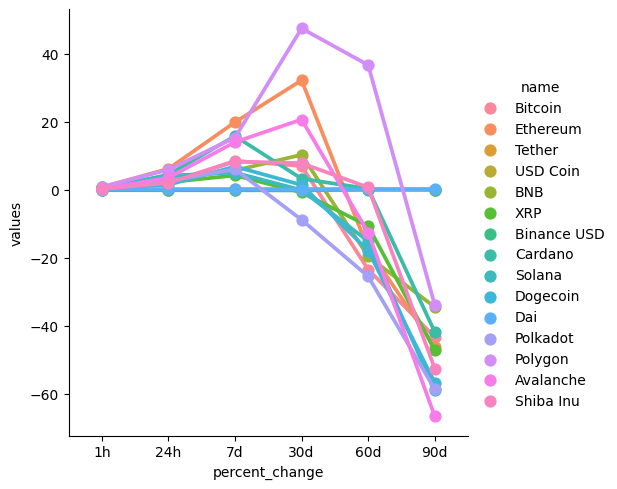

In [39]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')